# HW02: Tokenization

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

In [124]:
#Import the AG news dataset (same as hw01)
#Download them from here 
#!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


## Preprocess Text

In [125]:
import spacy
dfs = df.sample(50)
nlp = spacy.load('en_core_web_sm')

##TODO use spacy to split the documents in the sampled dataframe (dfs) in sentences and tokens
dfs['doc'] = dfs['text'].apply(nlp)

##TODO print the first sentence of the first document in your sample
text = dfs['doc'].iloc[0]
sent1 = list(text.sents)[0]
sent1

Near-Time touts content management tool for Mac OS X

In [126]:
##TODO create a new column with tokens in lowercase (x.lower()), without punctuation tokens (x.is_punct), stopwords (x.is_stop), and digits (x.is_digit)

def tokenize(x):
    # lowercase, without stopwords, punctuation and numbers
    return [w.lower_ for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit]
dfs['tokens'] = dfs['doc'].apply(tokenize)

print(dfs['tokens'].iloc[0])

['near', 'time', 'touts', 'content', 'management', 'tool', 'mac', 'os', 'x', 'company', 'new', 'flow', 'software', 'aims', 'integrate', 'information', 'places', 'single', 'interface', 'ease', 'use', 'collaboration', 'generally', 'works', 'according', 'columnist', 'ryan', 'faas']


In [127]:
##TODO print the tokens (x.lemma_) and the dependency labels (x.dep_ ) of the first sentence of the first document (doc.sents)
print([x.lemma_ for x in sent1])
print([x.dep_ for x in sent1])

['near', '-', 'time', 'tout', 'content', 'management', 'tool', 'for', 'Mac', 'os', 'X']
['compound', 'punct', 'compound', 'compound', 'compound', 'compound', 'nsubj', 'prep', 'pobj', 'ROOT', 'punct']


In [128]:
dfs.head()

,label,title,lead,text,doc,tokens
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,..."
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,..."
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro..."
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks..."
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea..."


### Named Entities

Let's compute the ratio of named entities starting with a capital letter, e.g. if we have "University of Chicago" as a NE, "University" and "Chicago" are capitalized, "of" is not, thus the ratio is 2/3.

In [129]:
##TODO print the ratio of tokens being part of a named entity span starting with a capital letter (doc.ents)

def calculate_ratio1(x):
    entities = x.ents
    entities_split = list([word for sentence in entities for word in sentence.text.split()])
    uppercase_words = [word for word in entities_split if word.istitle()]
    if len(entities_split) > 0:
      ratio = len(uppercase_words) / len(entities_split)
    else: 
      ratio = 0
    return ratio

dfs["ratio1"] = dfs["doc"].apply(calculate_ratio1)

dfs.head()


,label,title,lead,text,doc,tokens,ratio1
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692


In [130]:
##TODO print the ratio of capitalized tokens not being part of a named entity span (have no token.ent_type_)
# e.g. "The dog barks" = 1/3; 3 tokens, only "The" is capitalized

def calculate_ratio2(x):
    capitalized_tokens = [token for token in x if token.text.istitle() and not token.ent_type_]
    ratio = len(capitalized_tokens)/len(x)
    return(ratio)

dfs["ratio2"] = dfs["doc"].apply(calculate_ratio2)

dfs.head()

,label,title,lead,text,doc,tokens,ratio1,ratio2
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000,0.127660
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667,0.064516
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118,0.000000
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667,0.057143
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692,0.015873


In [131]:
##TODO print the ratio of capitalized tokens not being a named entity and not being the first token in a sentence
# e.g. "The dog barks" = 0; 3 tokens, "The" is capitalized but the starting token of a sentence, no other tokens are capitalized.

def calculate_ratio3(x):
    capitalized_tokens = [token for token in x if token.text.istitle() and not token.ent_type_ and token.i != token.sent[0].i]
    ratio = len(capitalized_tokens)/len(x)
    return(ratio)

dfs["ratio3"] = dfs["doc"].apply(calculate_ratio3)

dfs.head()

,label,title,lead,text,doc,tokens,ratio1,ratio2,ratio3
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000,0.127660,0.085106
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667,0.064516,0.000000
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118,0.000000,0.000000
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667,0.057143,0.028571
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692,0.015873,0.015873


Give an example of a capitalized token in the data which is neither a named entity nor at the start of a sentence. What could be the reason the token is capitalized (one sentence)?

One example are title case words in the title, like in 'Turning Up the Heat'. 

## Term Frequencies

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(2,2))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

##TODO using the whole sample, produce a world cloud with bigrams for label == business using tfidf frequencies
business_df = df[df['label'] == 'business']
X_tfidf = tfidf.fit_transform(business_df['text'])

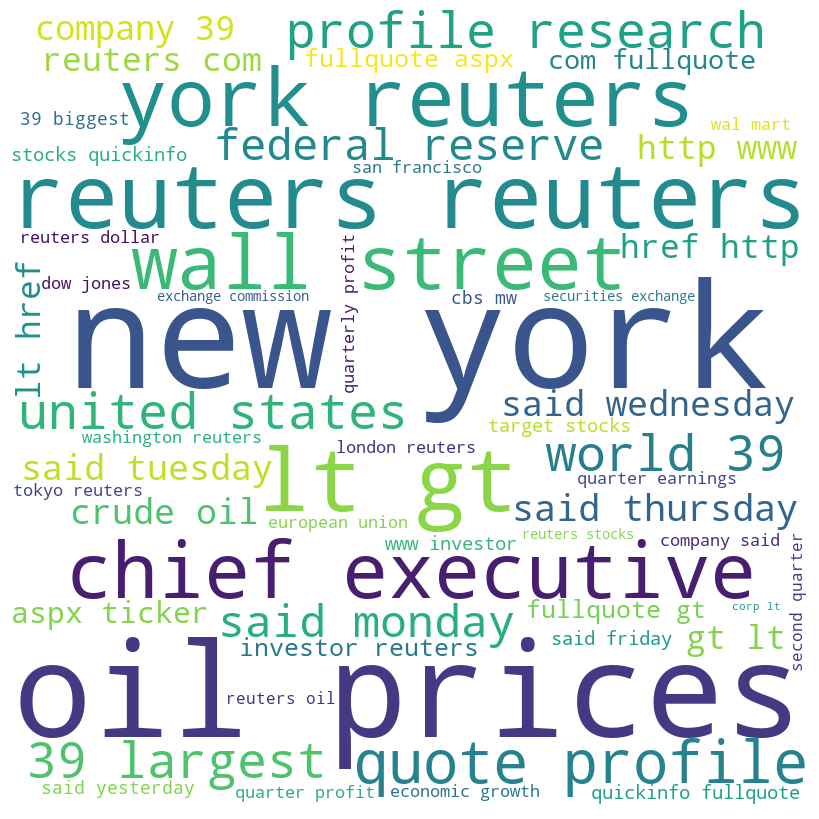

In [133]:
feature_names = tfidf.get_feature_names_out()
word_dict = {}
for i in range(len(feature_names)):
    word_dict[feature_names[i]] = X_tfidf[:, i].sum()

# create the wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(word_dict)

# plot the wordcloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Supervised Feature Selection

In [134]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

##TODO compute the number of words per document (excluding stopwords)
## define a function to count the number of words that are not stopwords 
def count_words(x):
    return len([w for w in nlp(x) if not w.is_stop])

## apply the function to the text column of the dataframe
dfs['word_count'] = dfs['text'].apply(count_words)

##TODO get the most predictive features of the number of words per document using first f_class and then chi2
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,1))

Y = dfs['word_count']
X = vec.fit_transform(dfs['text'])
vocab = vec.get_feature_names_out()
print(vocab[:100])

['000' '10' '100' '100th' '135' '14' '151' '17' '1950s' '1m' '2003' '2004'
 '2005' '2009' '24' '25' '27' '32' '36' '39' '41' '64' '666666' '80'
 '90th' 'abruptly' 'ac' 'acc' 'access' 'according' 'acknowledged'
 'activity' 'adapters' 'admitted' 'afghan' 'aging' 'ago' 'aims' 'air'
 'ala' 'alas' 'alaska' 'alexandria' 'alive' 'allows' 'amd' 'anaheim'
 'analysis' 'analysts' 'andy' 'angels' 'animals' 'ankara' 'anniversary'
 'announced' 'anti' 'ap' 'apparel' 'appeal' 'applied' 'appointed'
 'approve' 'approved' 'arch' 'arctic' 'argument' 'arial' 'arrested'
 'arrests' 'arrive' 'arsenal' 'article' 'asked' 'assessment' 'athens'
 'atlantic' 'attacks' 'attract' 'authority' 'available' 'average' 'bad'
 'baghdad' 'bank' 'banned' 'batterymates' 'beat' 'bedrock' 'began' 'begin'
 'benefits' 'beta' 'bids' 'big' 'bigger' 'biggest' 'billion' 'bit' 'blame'
 'blames']


In [135]:
## F_class
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

c:\Users\kschuepbach\.conda\envs\nlp_lss\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


['000',
 'nature',
 'tech',
 'premier',
 'terror',
 'terrorism',
 'commission',
 'runs',
 'atlantic',
 'thousands']

In [136]:
select = SelectKBest(chi2, k=10)
X_new = select.fit_transform(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['000',
 'raids',
 'randall',
 'conference',
 'conclude',
 'related',
 'commission',
 'researchers',
 'coast',
 'roll']

Are the results different? What could be a reason for this? 

Yes, the results are different, but some words appear in both methods.

## Huggingface Tokenizers

In [137]:
# # we use distilbert tokenizer
# !pip install transformers
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

##TODO tokenize the sentences in the sampled dataframe (dfs) using the DisilBertTokenizer
dfs['tokenized_text'] = dfs['text'].apply(tokenizer.tokenize)

dfs.head()

,label,title,lead,text,doc,tokens,ratio1,ratio2,ratio3,word_count,tokenized_text
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000,0.127660,0.085106,32,"[near, -, time, to, ##uts, content, management..."
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667,0.064516,0.000000,23,"[dell, am, ##d, ?, in, 2003, ,, am, ##d, launc..."
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118,0.000000,0.000000,34,"[#, 39, ;, human, error, #, 39, ;, crashed, d,..."
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667,0.057143,0.028571,27,"[stocks, higher, as, profit, worries, ease, st..."
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692,0.015873,0.015873,46,"[digital, music, #, 39, ;, niche, #, 39, ;, ma..."


In [138]:
##TODO what is the type/token ratio from this tokenizer (number_of_unqiue_token_types/number_of_tokens)?

#Example
text = "A very very short sentence."
token_ids = tokenizer.encode(text)
#print(token_ids)
#print(tokenizer.decode(token_ids))
num_unique_token_types = len(set(token_ids))
num_tokens = len(token_ids)
ratio = num_unique_token_types/num_tokens
print(ratio)

0.875


In [139]:
def calculate_ratio4(x):
    token_ids = tokenizer.encode(x)
    num_unique_token_types = len(set(token_ids))
    num_tokens = len(token_ids)
    ratio = num_unique_token_types/num_tokens
    return(ratio)

dfs['ratio4'] = dfs['text'].apply(calculate_ratio4)
dfs.head()

,label,title,lead,text,doc,tokens,ratio1,ratio2,ratio3,word_count,tokenized_text,ratio4
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000,0.127660,0.085106,32,"[near, -, time, to, ##uts, content, management...",0.903846
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667,0.064516,0.000000,23,"[dell, am, ##d, ?, in, 2003, ,, am, ##d, launc...",0.833333
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118,0.000000,0.000000,34,"[#, 39, ;, human, error, #, 39, ;, crashed, d,...",0.830189
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667,0.057143,0.028571,27,"[stocks, higher, as, profit, worries, ease, st...",0.850000
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692,0.015873,0.015873,46,"[digital, music, #, 39, ;, niche, #, 39, ;, ma...",0.602410


In [140]:
##TODO what is the amount of subword tokens returned by the huggingface tokenizer? hint: each subword token starts with "#"
import re

pattern = re.compile(r'##.*?\b')
def count_frequencies(word_list):
    text = ' '.join(word_list)
    num_occurrences = len(re.findall(pattern, text))
    return num_occurrences

# Example
#text = dfs.iloc[0]['tokenized_text']
#print(text)
#count_frequencies(text)

dfs['num_subwords'] = dfs['tokenized_text'].apply(count_frequencies)
dfs.head()

,label,title,lead,text,doc,tokens,ratio1,ratio2,ratio3,word_count,tokenized_text,ratio4,num_subwords
100073,sci/tech,Near-Time touts content management tool for Ma...,The company's new Flow software aims to integr...,Near-Time touts content management tool for Ma...,"(Near, -, Time, touts, content, management, to...","[near, time, touts, content, management, tool,...",1.000000,0.127660,0.085106,32,"[near, -, time, to, ##uts, content, management...",0.903846,2
89057,sci/tech,Dell AMD?,"In 2003, AMD launched the Opteron, a server ch...","Dell AMD? In 2003, AMD launched the Opteron, ...","(Dell, , AMD, ?, In, 2003, ,, AMD, launched, ...","[dell, , amd, amd, launched, opteron, server,...",0.166667,0.064516,0.000000,23,"[dell, am, ##d, ?, in, 2003, ,, am, ##d, launc...",0.833333,4
110211,sci/tech,#39;Human error #39; crashed DWP,Human error caused the crash that left 80 per ...,#39;Human error #39; crashed DWP Human error ...,"( , #, 39;Human, error, #, 39, ;, crashed, DWP...","[ , 39;human, error, crashed, dwp, human, erro...",0.294118,0.000000,0.000000,34,"[#, 39, ;, human, error, #, 39, ;, crashed, d,...",0.830189,4
26479,business,Stocks higher as profit worries ease,Stocks moved narrowly higher in early trading ...,Stocks higher as profit worries ease Stocks mo...,"(Stocks, higher, as, profit, worries, ease, St...","[stocks, higher, profit, worries, ease, stocks...",0.166667,0.057143,0.028571,27,"[stocks, higher, as, profit, worries, ease, st...",0.850000,2
45076,sci/tech,Digital music #39;niche #39; market for fores...,While digital music revenues will grow to be e...,Digital music #39;niche #39; market for fores...,"(Digital, music, , #, 39;niche, #, 39, ;, mar...","[digital, music, , 39;niche, market, foreseea...",0.307692,0.015873,0.015873,46,"[digital, music, #, 39, ;, niche, #, 39, ;, ma...",0.602410,2


# Parsing

In [141]:
import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df = df.sample(n=10000) # # only use 10K datapoints
df.head()

,label,title,lead,text
75287,sport,A New-Age General Manager Helps End an Age-Old...,Until Theo Epstein became the general manager ...,A New-Age General Manager Helps End an Age-Old...
82280,sci/tech,Tech.gov: Paying for Piracy in Advance,Should prices for blank media and recording pr...,Tech.gov: Paying for Piracy in Advance Should ...
18975,sport,New York Yankees Team Report - September 5,(Sports Network) - The Yankees will try to get...,New York Yankees Team Report - September 5 (Sp...
100545,world,House G.O.P. Voids Rule It Adopted Shielding L...,"After fierce criticism, House Republicans reve...",House G.O.P. Voids Rule It Adopted Shielding L...
16745,sci/tech,"Letting Gamers Play God, and Now Themselves","Peter Molyneux, widely considered one of the b...","Letting Gamers Play God, and Now Themselves Pe..."


In [142]:
import spacy
nlp = spacy.load('en_core_web_sm')
#TODO preprocess the corpus using spacy
df["processed"] = df["text"].apply(lambda x: nlp(x))

### Information Extraction

In [143]:
def extract_subject_verb_pairs(sent):
    subjs = [w for w in sent if w.dep_ == "nsubj"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in subjs]
    return pairs

##TODO extract the subject-verbs pairs and print the result for the second document
df["subj-verb-pairs"] = df["processed"].apply(lambda x: extract_subject_verb_pairs(x))

print(df.iloc[1]['text'])
print(df.iloc[1]['subj-verb-pairs'])

Tech.gov: Paying for Piracy in Advance Should prices for blank media and recording products include a royalty fee to copyright holders for presumed losses to piracy?
[]


In [144]:
##TODO create a list ranking the most common pairs and print the first 10 items
from collections import Counter
counter_subj_verb = Counter()

for item in df["subj-verb-pairs"]:
    counter_subj_verb.update(item)
    
for pair, counts in counter_subj_verb.most_common(n=10):
    print(pair, counts)

('it', 'be') 275
('official', 'say') 154
('he', 'be') 94
('that', 'be') 79
('company', 'say') 73
('they', 'be') 71
('report', 'say') 38
('he', 'have') 36
('what', 'be') 35
('that', 'allow') 34


In [145]:
##TODO do the same for verbs-object pairs ('dobj')
def extract_verb_obj_pairs(sent):
    dobj = [w for w in sent if w.dep_ == "dobj"]
    pairs = [(w.head.lemma_.lower(), w.lemma_.lower()) for w in dobj]
    return pairs

df["verb-obj-pairs"] = df["processed"].apply(lambda x: extract_verb_obj_pairs(x))

print(df.iloc[1]['text'])
print(df.iloc[1]['verb-obj-pairs'])

Tech.gov: Paying for Piracy in Advance Should prices for blank media and recording products include a royalty fee to copyright holders for presumed losses to piracy?
[('pay', 'price'), ('include', 'fee')]


In [146]:
##TODO create a list ranking the most common pairs and print the first 10 items
counter_verb_obj = Counter()

for item in df["verb-obj-pairs"]:
    counter_verb_obj.update(item)
    
for pair, counts in counter_verb_obj.most_common(n=10):
    print(pair, counts)

('fullquote.aspx?ticker', '=') 100
('kill', 'people') 82
('score', 'point') 37
('cut', 'job') 29
('take', 'lead') 28
('announce', 'plan') 27
('reach', 'agreement') 26
('pay', 'million') 25
('file', 'lawsuit') 22
('sign', 'agreement') 22


In [147]:
##TODO do the same for adjectives-nouns pairs ('amod')
def extract_adj_noun_pairs(sent):
    amod = [w for w in sent if w.dep_ == "amod"]
    pairs = [(w.lemma_.lower(), w.head.lemma_.lower()) for w in amod]
    return pairs

df["adj-noun-pairs"] = df["processed"].apply(lambda x: extract_adj_noun_pairs(x))

print(df.iloc[1]['text'])
print(df.iloc[1]['adj-noun-pairs'])

Tech.gov: Paying for Piracy in Advance Should prices for blank media and recording products include a royalty fee to copyright holders for presumed losses to piracy?
[('blank', 'product'), ('presume', 'loss')]


In [148]:
##TODO create a list ranking the most common pairs and print the first 10 items
counter_adj_noun = Counter()

for item in df["adj-noun-pairs"]:
    counter_adj_noun.update(item)
    
for pair, counts in counter_adj_noun.most_common(n=10):
    print(pair, counts)

('third', 'quarter') 138
('first', 'time') 101
('next', 'year') 101
('last', 'night') 98
('last', 'week') 95
('last', 'year') 73
('open', 'source') 67
('last', 'month') 66
('chief', 'executive') 57
('presidential', 'election') 57


### Exploring cross label dependencies

In [149]:
##TODO extract all the subject-verbs and verbs-object pairs for the verb "rise"
for (subject, verb), counts in counter_subj_verb.most_common():
    if verb == "rise" and counts > 1:
        print(subject, verb, counts)

profit rise 33
price rise 15
earning rise 10
stock rise 7
average rise 7
toll rise 6
dollar rise 5
sale rise 5
share rise 5
oil rise 5
cost rise 4
number rise 4
order rise 4
future rise 3
revenue rise 3
claims rise 3
update rise 3
income rise 3
index rise 3
yen rise 2
activity rise 2
spending rise 2
hiring rise 2
rise rise 2
nikkei rise 2
demand rise 2
rate rise 2
ocean rise 2


In [150]:
for (verb, object), counts in counter_verb_obj.most_common():
    if verb == "rise" and counts > 1:
        print(verb, object, counts)

rise inc. 2


In [151]:
##TODO for each label create a list ranking the most common subject-verbs pairs and one for the most common verbs-object pairs
##TODO print the 10 most common pairs for each of the two lists for the labels "world" and "sci/tech"